# **Лабораторная работа 1**
**Задание 1**

In [ ]:
!pip install scikit-image
!pip install scikit-learn
!pip install jupyterlab
!pip install matplotlib
!pip install numpy
!pip install opencv-python==4.3.0.36

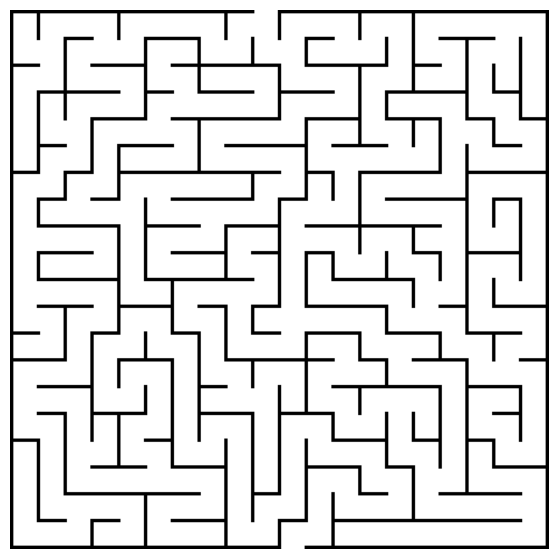

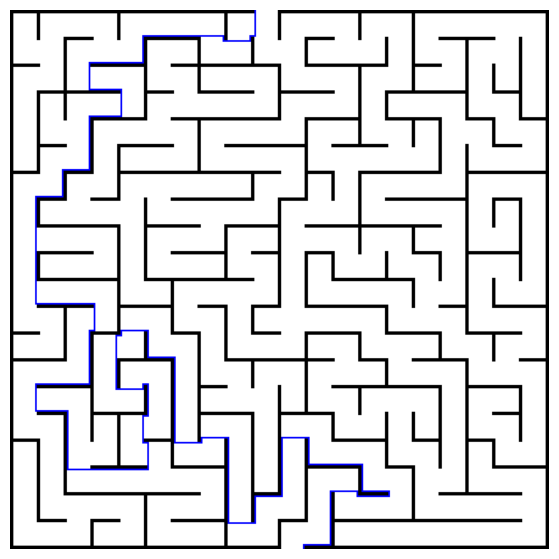

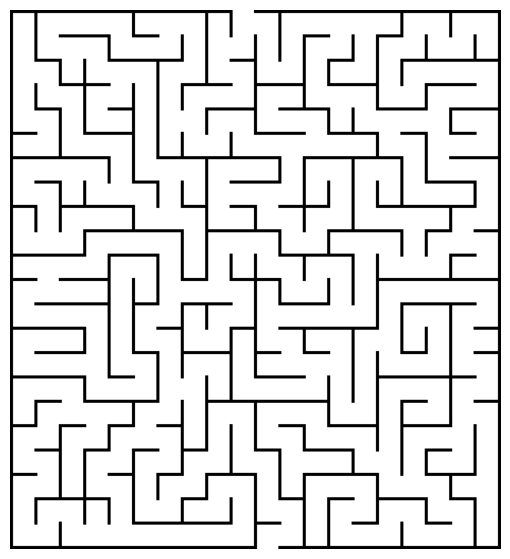

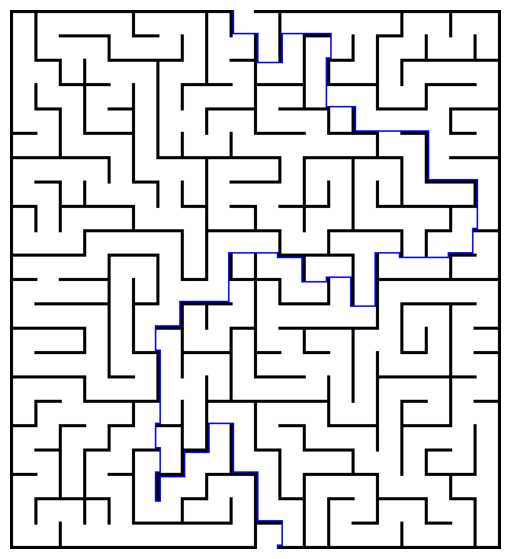

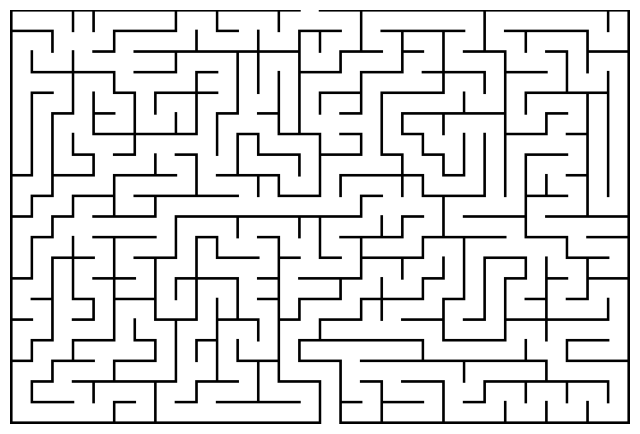

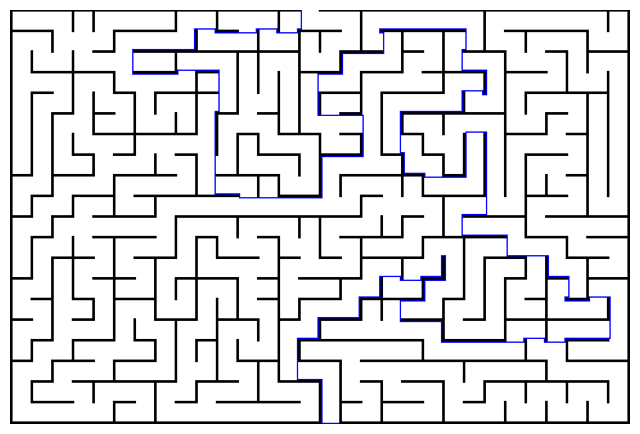

In [5]:
import cv2
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

def plot_one_image(image: np.ndarray) -> None:
    """
    Отобразить изображение с помощью matplotlib.
    Вспомогательная функция.

    :param image: изображение для отображения
    :return: None
    """
    fig, axs = plt.subplots(1, 1, figsize=(8, 7))

    axs.imshow(image)
    axs.axis('off')
    plt.plot()

def find_way_from_maze(image: np.ndarray) -> tuple:
    """
    Найти путь через лабиринт.

    :param image: изображение лабиринта
    :return: координаты пути из лабиринта в виде (x, y), где x и y - это массивы координат
    """
    coords = None
    # Ваш код тут
    # Получаем бинарную маску
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
    height, width = binary.shape
    # Чтобы начать алгоритм поиска, нам нужен вход и выход
    start, end = find_start_and_end(binary)
    if start is None or end is None:
        print("Нет входа или выхода")
        return None
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    # Алгоритм будет реализован через очередь
    queue = deque([start])
    visited = set()
    visited.add(start)
    # Запишем сюда ребенок -> родитель (две подряд идущие ячейки нашего пути)
    parent = {start: None}

    while queue:
        current = queue.popleft()
        # Если нашли выход, то выходим
        if current == end:
            break
        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])

            # Если не вышли за пределы картинки и попали в белую ячейку
            # и не были еще в этой клетке, то записываем её в массив посещенных клеток
            # в очередь для дальнейшей проверки и её родителя
            if (0 <= neighbor[0] < height and
                0 <= neighbor[1] < width and
                binary[neighbor] == 0 and
                neighbor not in visited):
                visited.add(neighbor)
                queue.append(neighbor)
                parent[neighbor] = current
    # Восстановление пути от конца к началу
    coords = []
    step = end
    while step is not None:
        coords.append(step)
        step = parent.get(step)
    coords.reverse()
    x_coords, y_coords = ([], [])
    if coords:
        x_coords, y_coords = zip(*coords)
    return (x_coords, y_coords)

def find_start_and_end(binary: np.ndarray) -> tuple:
    """
    Найти вход и выход из лабиринта в координатах

    :param binary: бинарное изображение лабиринта
    :return: вход и выход в коррдинатах
    """
    start = None
    end = None

    for i in range(binary.shape[0]):
        for j in range(binary.shape[1]):
            if binary[i, j] == 0:
                start = (i, j)
                break
        if start is not None:
            break

    for i in range(binary.shape[0]-1, -1, -1):
        for j in range(binary.shape[1]-1, -1, -1):
            if binary[i, j] == 0:
                end = (i, j)
                break
        if end is not None:
            break

    return start, end

def plot_maze_path(image: np.ndarray, coords: tuple) -> np.ndarray:
    """
    Нарисовать путь через лабиринт на изображении.
    Вспомогательная функция.

    :param image: изображение лабиринта
    :param coords: координаты пути через лабиринт типа (x, y) где x и y - массивы координат точек
    :return img_wpath: исходное изображение с отрисованными координатами
    """
    if image.ndim != 3:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    img_wpath = image.copy()
    if coords:
        x, y = coords
        img_wpath[x, y, :] = [0, 0, 255]

    return img_wpath

# Загрузка тестового изображения и выполнение функций
test_image = cv2.imread('20 by 20 orthogonal maze.png')  # загрузить тестовую картинку
plot_one_image(test_image)
way_coords = find_way_from_maze(test_image)  # вычислить координаты пути через лабиринт
image_with_way = plot_maze_path(test_image, way_coords)
plot_one_image(image_with_way)

test_image = cv2.imread('20 by 22 orthogonal maze.png')  # загрузить тестовую картинку
plot_one_image(test_image)
way_coords = find_way_from_maze(test_image)  # вычислить координаты пути через лабиринт
image_with_way = plot_maze_path(test_image, way_coords)
plot_one_image(image_with_way)

test_image = cv2.imread('30 by 20 orthogonal maze.png')  # загрузить тестовую картинку
plot_one_image(test_image)
way_coords = find_way_from_maze(test_image)  # вычислить координаты пути через лабиринт
image_with_way = plot_maze_path(test_image, way_coords)
plot_one_image(image_with_way)

**Задание 2**

Нужно перестроиться на дорогу номер 4


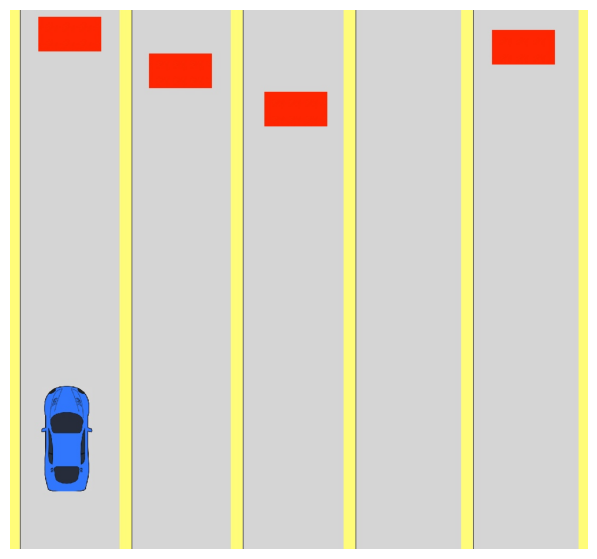

In [6]:
def find_road_number(image: np.ndarray) -> int:
    """
    Найти номер дороги, на которой нет препятсвия в конце пути.

    :param image: исходное изображение
    :return: номер дороги, на котором нет препятсвия на дороге
    """
    road_number = None
    # Ваш код тут
    # Диапазоны для серого и красного цветов
    gray_lower = (200, 200, 200)
    gray_upper = (220, 220, 220)
    red_lower = (230, 0, 0)
    red_upper = (255, 50, 50)
    # Маски для этих цветов
    gray_mask = cv2.inRange(image, gray_lower, gray_upper)
    red_mask = cv2.inRange(image, red_lower, red_upper)
    # Находим контуры серых дорожек
    contours_gray, _ = cv2.findContours(gray_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Переворачиваем коллекцию (почему-то они записаны в обратном порядке...)
    contours_gray = contours_gray[::-1]
    road_number = None
    # Перебираем контуры серых дорожек
    for i, contour in enumerate(contours_gray):
        x, y, w, h = cv2.boundingRect(contour)
        # Проверяем наличие красного прямоугольника на этой дороге
        road_region = red_mask[y:y+h, x:x+w]
        if np.sum(road_region) == 0:
            road_number = i + 1
            break
    return road_number

test_image = cv2.imread('image_01.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)
road_number = find_road_number(test_image)

print(f'Нужно перестроиться на дорогу номер {road_number}')

**Задание 3**

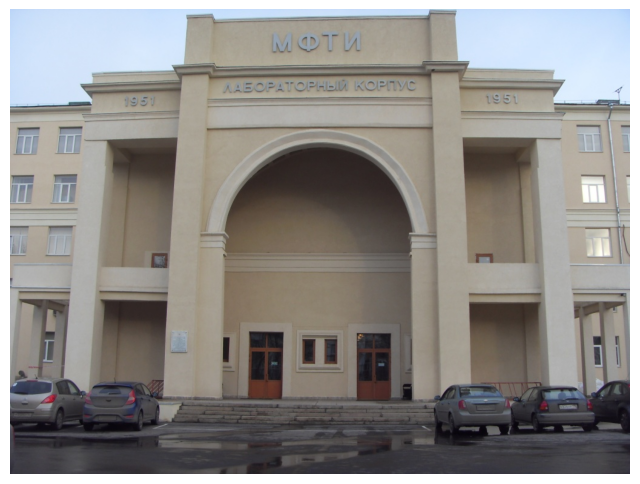

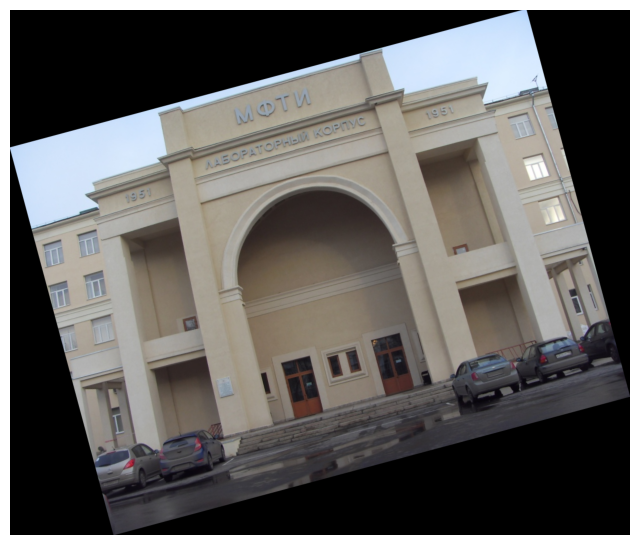

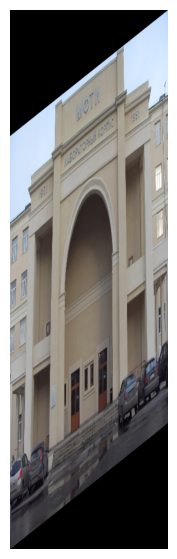

In [101]:

def rotate(image, point: tuple, angle: float) -> np.ndarray:
    """
    Повернуть изображение по часовой стрелке на угол от 0 до 360 градусов и преобразовать размер изображения.

    :param image: исходное изображение
    :param point: значение точки (x, y), вокруг которой повернуть изображение
    :param angle: угол поворота
    :return: повернутное изображение
    """
    img_height, img_width = image.shape[:2]
    img_center = (img_width / 2, img_height / 2)
    rotation_matrix = cv2.getRotationMatrix2D(img_center, angle, scale=1.0)

    cos_val = abs(rotation_matrix[0, 0])
    sin_val = abs(rotation_matrix[0, 1])

    new_image_width = int(img_height * sin_val + img_width * cos_val)
    new_image_height = int(img_height * cos_val + img_width * sin_val)

    rotation_matrix[0, 2] += new_image_width / 2 - img_center[0]
    rotation_matrix[1, 2] += new_image_height / 2 - img_center[1]

    rotated_image = cv2.warpAffine(image, rotation_matrix, (new_image_width, new_image_height))
    return rotated_image

def apply_warpAffine(image, points1, points2) -> np.ndarray:
    """
    Применить афинное преобразование согласно переходу точек points1 -> points2 и
    преобразовать размер изображения.

    :param image:
    :param points1:
    :param points2:
    :return: преобразованное изображение
    """
    # Ваш код
    transformation_matrix = cv2.getAffineTransform(points1, points2)
    img_height, img_width = image.shape[:2]

    corners = np.array([
        [0, 0, 1],
        [0, img_height, 1],
        [img_width, 0, 1],
        [img_width, img_height, 1]
    ])
    transformed_corners = np.dot(transformation_matrix, corners.T).T

    x_min = np.min(transformed_corners[:, 0])
    x_max = np.max(transformed_corners[:, 0])
    y_min = np.min(transformed_corners[:, 1])
    y_max = np.max(transformed_corners[:, 1])

    transformation_matrix[0, 2] -= x_min
    transformation_matrix[1, 2] -= y_min

    transformed_image = cv2.warpAffine(image, transformation_matrix, (round(x_max - x_min), round(y_max - y_min)))
    return transformed_image

test_image = cv2.imread('lk.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)
test_point = (200, 200)
test_angle = 15

transformed_image = rotate(test_image, test_point, test_angle)
plot_one_image(transformed_image)

test_point_1 = np.float32([[50, 50], [400, 50], [50, 200]])
test_point_2 = np.float32([[100, 100], [200, 20], [100, 250]])

transformed_image = apply_warpAffine(test_image, test_point_1, test_point_2)
plot_one_image(transformed_image)